In [42]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import torch
import torch.nn as nn
import torch.nn.functional as F


In [23]:
import sys
import os


sys.path.append(os.path.abspath("/Users/monika/Desktop/DP/DP_QSAR_Skin_Irritation"))
from imports import *

In [87]:
file_path = "Features/Large/selected_features_CorrVar.xlsx"
df = pd.read_excel(file_path)
df.head()

,Irritation,MaxAbsEStateIndex,MinAbsEStateIndex,MinEStateIndex,SPS,MolWt,NumValenceElectrons,MaxPartialCharge,MinPartialCharge,MaxAbsPartialCharge,...,RingCount,MolLogP,fr_C_O,fr_C_O_noCOO,fr_NH0,fr_NH1,fr_amide,fr_aniline,fr_ether,fr_halogen
0,0,0.545511,0.223433,0.490223,0.390551,0.291325,0.250000,0.472316,0.592036,-1.017995,...,0.447214,0.451534,0.0,0.000000,0.707107,0.0,0.0,0.0,0.000000,0.707107
1,1,0.591920,0.253125,0.601726,0.389406,0.277681,0.278846,0.315886,0.215424,1.052267,...,0.447214,0.416318,0.5,0.707107,0.000000,0.0,0.0,0.0,0.707107,0.000000
2,1,0.553126,0.334919,0.502072,0.400859,0.399452,0.278846,0.472195,0.592036,-1.018511,...,0.447214,0.475805,0.0,0.000000,0.707107,0.0,0.0,0.0,0.000000,0.707107
3,0,0.612445,0.602032,0.496240,0.408749,0.461148,0.423077,0.676377,0.290413,0.491735,...,0.000000,0.560347,0.5,0.707107,0.000000,0.0,0.0,0.0,0.707107,0.000000
4,0,0.618170,0.914475,0.141109,0.000000,0.000000,0.000000,0.354992,0.378416,-0.071536,...,0.000000,0.225586,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000


In [ ]:
X = df.drop(columns="Irritation")
y = df["Irritation"]

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, stratify=y)

In [86]:
file_path = "Features/Large/selected_features_CorrVar_train.xlsx"
train_df = pd.read_excel(file_path)

file_path = "Features/Large/selected_features_CorrVar_test.xlsx"
test_df = pd.read_excel(file_path)
test_df.head()

,Irritation,MaxAbsEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,MaxPartialCharge,MinPartialCharge,FpDensityMorgan1,...,fr_ketone,fr_ketone_Topliss,fr_methoxy,fr_nitro,fr_nitro_arom_nonortho,fr_para_hydroxylation,fr_pyridine,fr_sulfide,fr_sulfonamd,fr_unbrch_alkane
0,1,0.240357,0.122466,0.883965,0.516715,0.146120,0.137076,0.099054,0.404068,0.457014,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0,0.266667
1,1,0.656612,0.072275,0.843846,0.460035,0.308456,0.108934,0.421569,0.104158,0.839572,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0,0.000000
2,1,0.657227,0.106517,0.830971,0.472453,0.592431,0.117575,0.447779,0.118396,0.656863,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0,0.000000
3,1,0.250199,0.321182,0.924882,0.525440,0.085153,0.074889,0.109635,0.868696,0.485294,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0,0.000000
4,0,0.478105,0.073296,0.873840,0.602064,0.085153,0.055022,0.134503,0.267949,0.485294,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0,0.000000


In [27]:
X_train = train_df.drop(columns=["Irritation"])
y_train = train_df["Irritation"]
X_test = test_df.drop(columns=["Irritation"])
y_test = test_df["Irritation"]

In [90]:
# Convert to NumPy before converting to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)  # Reshape for PyTorch
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)


In [91]:
print("X_train shape:", X_train_tensor.shape)
print("y_train shape:", y_train_tensor.shape)


X_train shape: torch.Size([1989, 97])
y_train shape: torch.Size([1989, 1])


In [92]:
# Create TensorDataset
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# Define DataLoaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [93]:
class EarlyStopping:
    def __init__(self, patience=10):  # Stop if validation loss doesn't improve for 10 epochs
        self.patience = patience
        self.best_loss = float("inf")
        self.counter = 0

    def check(self, val_loss):
        if val_loss < self.best_loss:
            self.best_loss = val_loss
            self.counter = 0  # Reset counter if loss improves
            return False
        else:
            self.counter += 1
            if self.counter >= self.patience:
                print("Early stopping triggered!")
                return True  # Stop training
        return False


In [94]:
class SkinIrritationNN(nn.Module):
    def __init__(self, input_dim):
        super(SkinIrritationNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.bn1 = nn.BatchNorm1d(128)
        self.fc2 = nn.Linear(128, 64)
        self.bn2 = nn.BatchNorm1d(64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 1)

    def forward(self, x):
        x = F.leaky_relu(self.bn1(self.fc1(x)), 0.01)
        x = F.dropout(x, 0.6, training=self.training)
        x = F.leaky_relu(self.bn2(self.fc2(x)), 0.01)
        x = F.dropout(x, 0.6, training=self.training)
        x = F.leaky_relu(self.fc3(x), 0.01)
        x = torch.sigmoid(self.fc4(x))  
        return x

In [95]:
# Get input dimension
input_dim = X_train.shape[1]

# Initialize model
model = SkinIrritationNN(input_dim)

# Define loss function and optimizer
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = torch.optim.AdamW(model.parameters(), lr=0.0001, weight_decay=1e-4)


In [96]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
import numpy as np

# Track losses
train_losses = []
val_losses = []

epochs = 200  # Max limit
early_stopping = EarlyStopping(patience=10)

epochs = 200  # Max limit
for epoch in range(epochs):
    model.train()
    epoch_loss = 0
    
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        y_pred = model(batch_X)
        loss = criterion(y_pred, batch_y)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()

    train_losses.append(epoch_loss / len(train_loader))

    # Validation step
    model.eval()
    val_loss = 0
    val_preds = []
    val_labels = []
    with torch.no_grad():
        for batch_X, batch_y in test_loader:
            y_pred = model(batch_X)
            val_loss += criterion(y_pred, batch_y).item()
            val_preds.append(y_pred.numpy())
            val_labels.append(batch_y.numpy())

    val_preds = np.concatenate(val_preds, axis=0)
    val_labels = np.concatenate(val_labels, axis=0)
    
    val_losses.append(val_loss / len(test_loader))
    
    print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_losses[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}")

    # Check early stopping condition
    if early_stopping.check(val_loss):
        break  # Stop training


Epoch 1/200, Train Loss: 0.7122, Val Loss: 0.7043
Epoch 2/200, Train Loss: 0.7064, Val Loss: 0.6984
Epoch 3/200, Train Loss: 0.7010, Val Loss: 0.6923
Epoch 4/200, Train Loss: 0.6941, Val Loss: 0.6861
Epoch 5/200, Train Loss: 0.6846, Val Loss: 0.6812
Epoch 6/200, Train Loss: 0.6831, Val Loss: 0.6753
Epoch 7/200, Train Loss: 0.6743, Val Loss: 0.6676
Epoch 8/200, Train Loss: 0.6712, Val Loss: 0.6622
Epoch 9/200, Train Loss: 0.6658, Val Loss: 0.6577
Epoch 10/200, Train Loss: 0.6628, Val Loss: 0.6519
Epoch 11/200, Train Loss: 0.6507, Val Loss: 0.6480
Epoch 12/200, Train Loss: 0.6465, Val Loss: 0.6392
Epoch 13/200, Train Loss: 0.6452, Val Loss: 0.6331
Epoch 14/200, Train Loss: 0.6419, Val Loss: 0.6261
Epoch 15/200, Train Loss: 0.6310, Val Loss: 0.6216
Epoch 16/200, Train Loss: 0.6253, Val Loss: 0.6172
Epoch 17/200, Train Loss: 0.6200, Val Loss: 0.6138
Epoch 18/200, Train Loss: 0.6250, Val Loss: 0.6080
Epoch 19/200, Train Loss: 0.6262, Val Loss: 0.6034
Epoch 20/200, Train Loss: 0.6117, Val Lo

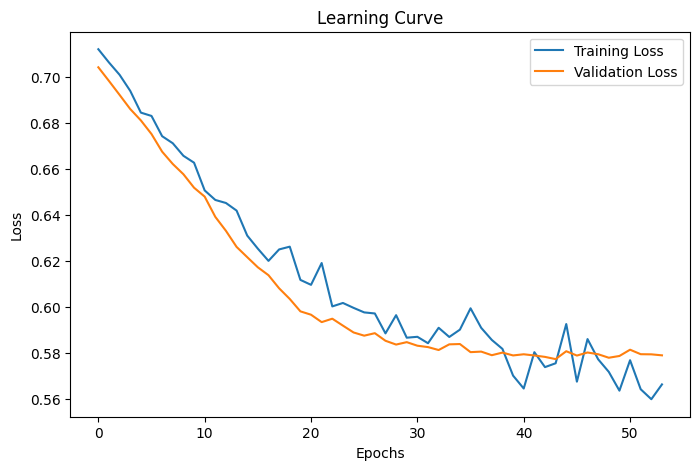

In [97]:
import matplotlib.pyplot as plt

# Plot Loss Curve
plt.figure(figsize=(8, 5))
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Learning Curve")
plt.legend()
plt.show()


In [98]:
model.eval()
y_pred_list = []

with torch.no_grad():
    for batch_X, _ in test_loader:
        y_pred = model(batch_X)
        y_pred_list.extend(y_pred.numpy())

# Convert predictions to binary (0 or 1)
y_pred_list = [1 if pred > 0.5 else 0 for pred in y_pred_list]

# Print classification report
print("Accuracy:", accuracy_score(y_test, y_pred_list))
print(classification_report(y_test, y_pred_list))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_list))


Accuracy: 0.7128514056224899
              precision    recall  f1-score   support

           0       0.68      0.76      0.72       241
           1       0.75      0.67      0.71       257

    accuracy                           0.71       498
   macro avg       0.71      0.71      0.71       498
weighted avg       0.72      0.71      0.71       498

Confusion Matrix:
 [[182  59]
 [ 84 173]]


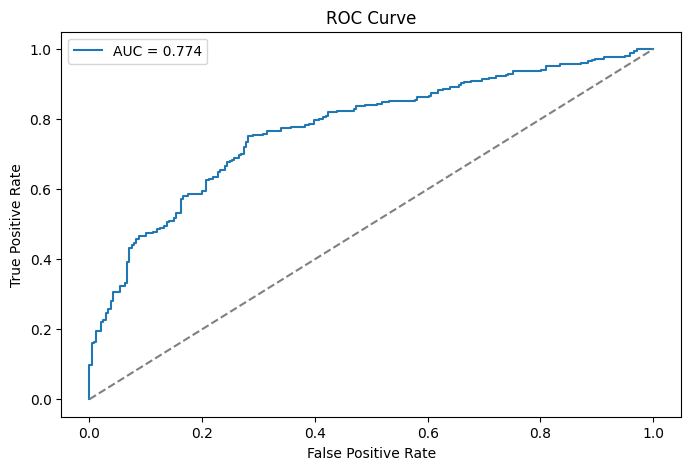

In [99]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get model predictions
model.eval()
y_pred_probs = []  # Probabilities

with torch.no_grad():
    for batch_X, _ in test_loader:
        y_pred = model(batch_X)
        y_pred_probs.extend(y_pred.numpy())

# Convert to NumPy array
y_pred_probs = np.array(y_pred_probs)

# Compute ROC curve & AUC score
fpr, tpr, _ = roc_curve(y_test, y_pred_probs)  # False positive rate, True positive rate
auc_score = roc_auc_score(y_test, y_pred_probs)

# Plot ROC Curve
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.3f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # Random classifier line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


In [21]:
import torch

# Predpokladám, že model je instanciou tvojej neurónovej siete
torch.save(model.state_dict(), "nn.pth")


In [22]:
# Uloženie celého modelu (architektúra + váhy)
torch.save(model, "nn.pth")